<a href="https://colab.research.google.com/github/aunz/ds/blob/master/Air_Passengers_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

We are using the classic Air Passengers dataset, containing international airline passengers between 1949 to 1960 

In [53]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Download the data and read them into pandas data frame


In [3]:
!curl -O http://www-eio.upc.edu/~pau/cms/rdata/csv/datasets/AirPassengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3326  100  3326    0     0   4353      0 --:--:-- --:--:-- --:--:--  4353


In [4]:
data = pd.read_csv('AirPassengers.csv', usecols=['time', 'AirPassengers'])
data.head()

,time,AirPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Oh no, the time colum is all messed up. We will need to fix it a bit.


In [5]:
data['time'] = data.time.astype(int).astype(str) + '-' + np.round((data.time - data.time.astype(int)) * 12 + 1).astype(int).astype(str)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m')
data = data.set_index('time')
data.head()

,AirPassengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


A picture is worth a thousand words. We can see that the number of air passengers increased over time.

Also, there is a seasonal variation with more passengers during the middle of a year

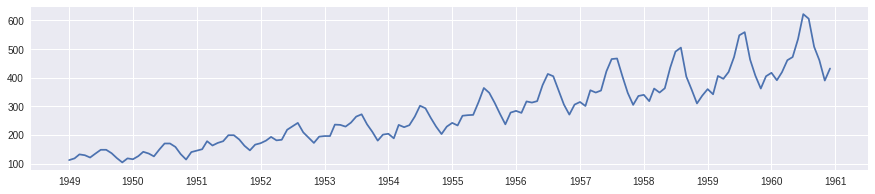

In [52]:
_, ax = plt.subplots(figsize=(15, 3))
ax.plot(data)
ax.xaxis.set_major_locator(__import__('matplotlib').dates.YearLocator())
ax.xaxis.set_minor_locator(__import__('matplotlib').dates.MonthLocator())

<function matplotlib.pyplot.axes>

In [16]:
ax.xaxis.set_major_formatter(__import__('matplotlib').dates.MonthLocator())